## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('WineData.csv')
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [12]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [13]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

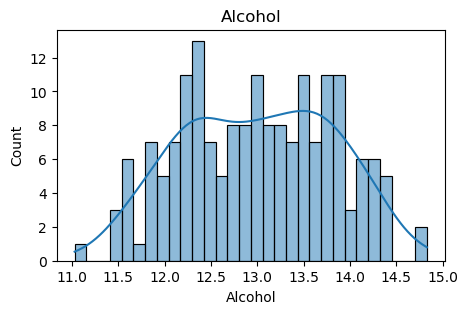

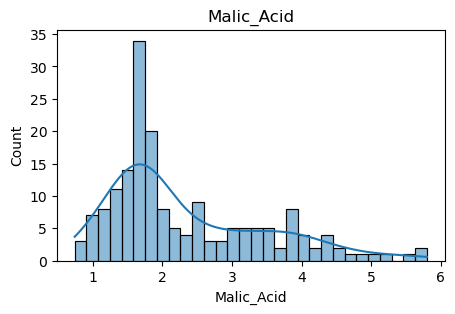

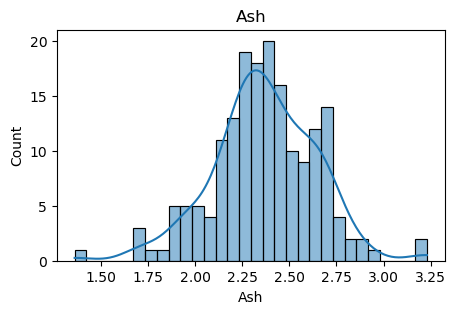

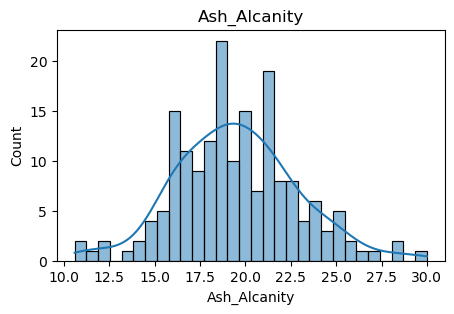

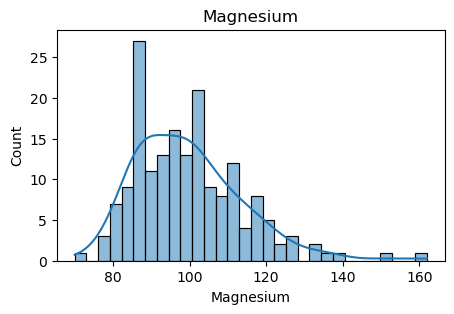

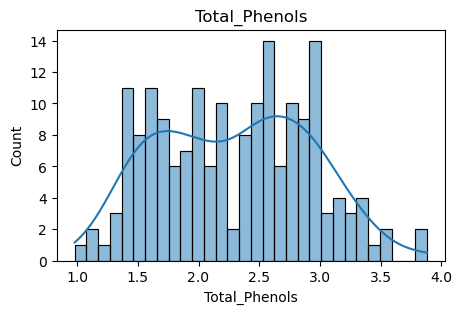

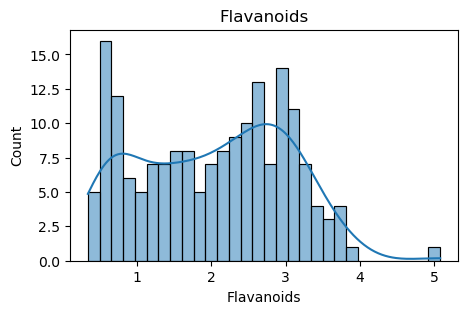

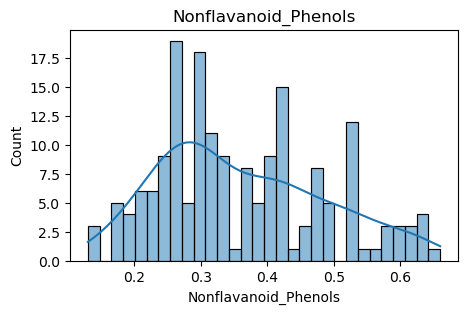

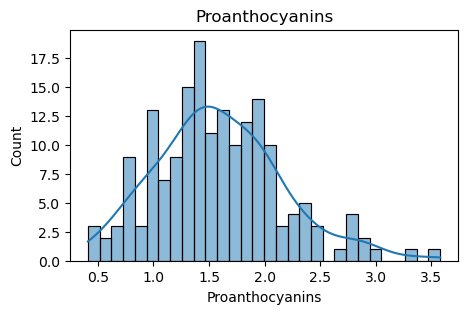

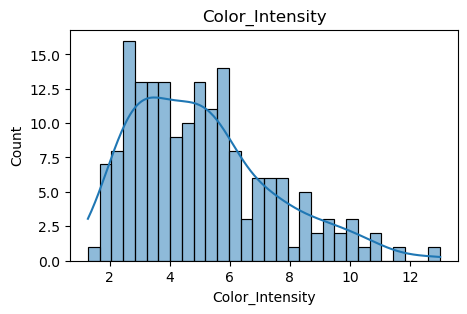

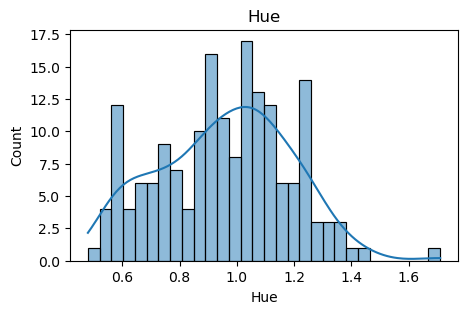

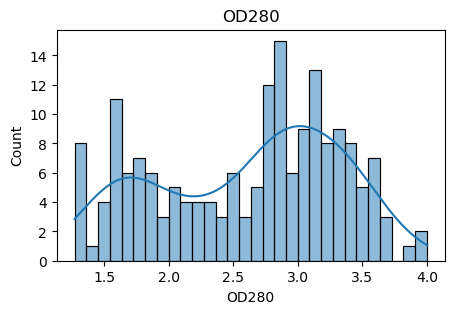

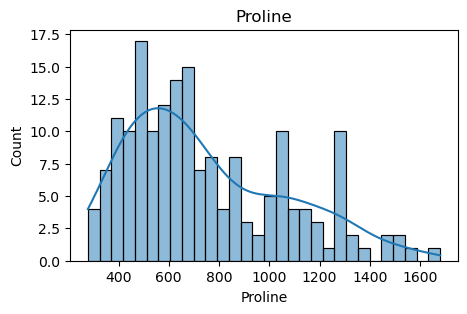

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
df_stdSccaler = StandardScaler().fit_transform(df)

In [19]:
df_stdSccaler = pd.DataFrame(df_stdSccaler, columns=df.columns)

In [20]:
df_stdSccaler.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [21]:
df_min_mx_scaler = MinMaxScaler().fit_transform(df)

In [22]:
df_min_mx_scaler = pd.DataFrame(df_min_mx_scaler,columns=df.columns)

In [23]:
df_min_mx_scaler.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss = []

for k in range(1, 15):
    km2 = KMeans(n_clusters=k)
    km2.fit(df_min_mx_scaler)
    wcss.append(km2.inertia_)

In [26]:
wcss

[95.59953778471059,
 64.55244366092768,
 48.972480963458445,
 44.85986437980158,
 43.64787044773571,
 40.44022940012351,
 38.71331733206337,
 36.75273960802919,
 36.0512029242349,
 33.31177734244045,
 31.80507406024461,
 31.247917771138514,
 31.077584375050506,
 29.100448242304083]

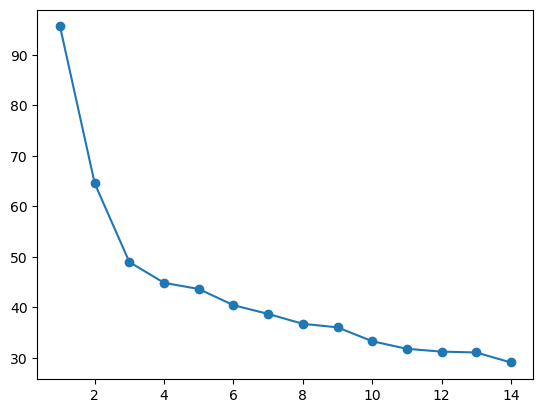

In [27]:
plt.plot(range(1,15), wcss, marker='o')

In [28]:
from kneed import KneeLocator
kne = KneeLocator(range(1,15), wcss, curve='convex', direction = 'decreasing',)
kne.knee

np.int64(3)

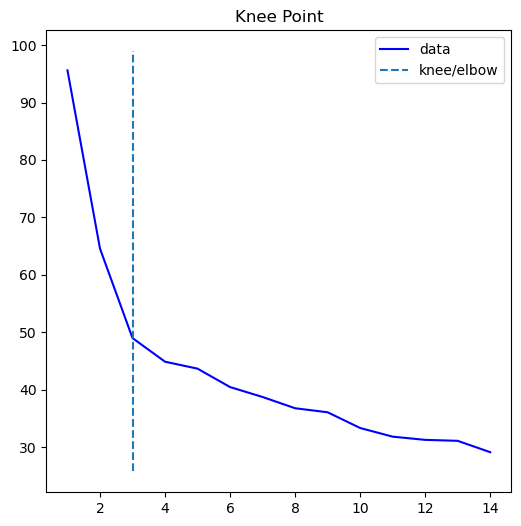

In [30]:
kne.plot_knee()

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [33]:
km1 = KMeans(n_clusters=3)
km1.fit(df_min_mx_scaler[["Alcohol","Malic_Acid"]])

KMeans(n_clusters=3)

In [34]:
df1_min_max_scale = df_min_mx_scaler[["Alcohol","Malic_Acid"]]

In [36]:
df1_min_max_scale["cluster-label"] = km1.predict(df1_min_max_scale)

/tmp/ipykernel_11527/1097060431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_min_max_scale["cluster-label"] = km1.predict(df1_min_max_scale)


In [39]:
df1_min_max_scale["cluster-label"][20:41]

20    0
21    1
22    0
23    2
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    1
40    0
Name: cluster-label, dtype: int32

In [40]:
df1_min_max_scale.head()

,Alcohol,Malic_Acid,cluster-label
0,0.842105,0.191700,0
1,0.571053,0.205534,0
2,0.560526,0.320158,0
3,0.878947,0.239130,0
4,0.581579,0.365613,0


### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [41]:
km1.cluster_centers_

array([[0.70394737, 0.20673135],
       [0.53815789, 0.62205534],
       [0.30547538, 0.1840176 ]])

In [42]:
df0 = df1_min_max_scale[df1_min_max_scale["cluster-label"]==0]
df0.head()

,Alcohol,Malic_Acid,cluster-label
0,0.842105,0.191700,0
1,0.571053,0.205534,0
2,0.560526,0.320158,0
3,0.878947,0.239130,0
4,0.581579,0.365613,0


In [43]:
df0.shape

(66, 3)

In [44]:
df1 = df1_min_max_scale[df1_min_max_scale["cluster-label"]==1]
df2 = df1_min_max_scale[df1_min_max_scale["cluster-label"]==2]

In [45]:
df1.shape

(50, 3)

In [46]:
df2.shape

(62, 3)

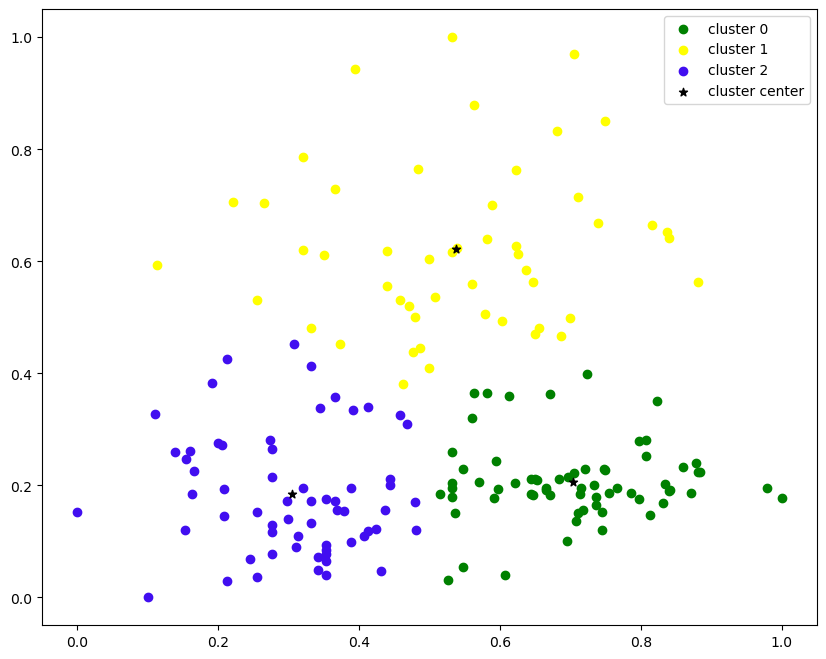

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(df0['Alcohol'], df0["Malic_Acid"], color='green', label='cluster 0')
plt.scatter(df1["Alcohol"], df1["Malic_Acid"], color='yellow', label='cluster 1')
plt.scatter(df2["Alcohol"], df2["Malic_Acid"], color='#410EF0', label='cluster 2')

plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker = '*', label='cluster center', color='black')

plt.legend()

### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


In [50]:
# Add cluster labels to datas
# kmeans.labels_
km1.labels_

# Get mean of each cluster
# cluster_means = df.groupby('Cluster').mean()
# print(cluster_means)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1,
       0, 1], dtype=int32)

# Best of Luck